In [60]:
import numpy as np
import time
import JaxPeriodDrwFit
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [74]:
# run 4
drw_amp = 0.2
drw_tau = 100
per_amp = 0.5
per_tau = 200
res = np.load('/astro/users/ncaplar/data/res_tests/COMB_004_000_000_run_0.npy')
res_drw = np.load('/astro/users/ncaplar/data/res_tests/COMB_004_000_000_drw_run_0.npy')

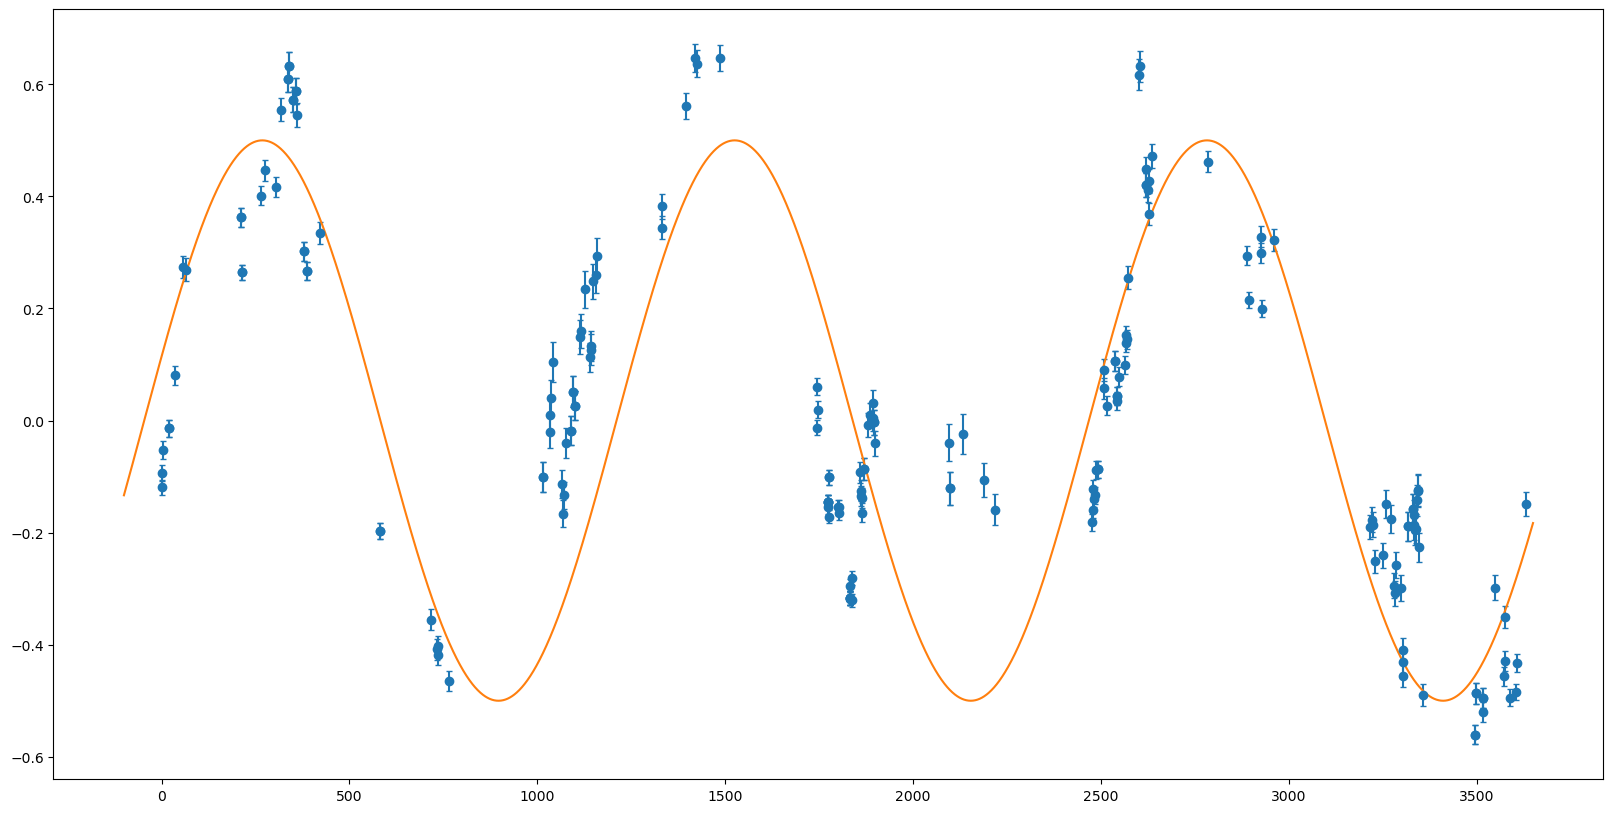

In [82]:
t_multi_LSST = np.load('/astro/users/ncaplar/data/t_multi_LSST.npy')
y_multi_LSST = np.load('/astro/users/ncaplar/data/y_multi_LSST.npy')
yerr_multi_LSST = np.load('/astro/users/ncaplar/data/yerr_multi_LSST.npy')
plt.figure(figsize=(20,10))
plt.errorbar(t_multi_LSST[0], y_multi_LSST[0], yerr=yerr_multi_LSST[0], ls='', marker='o',capsize=2)

Per = 200
phi = 0.23
per_amp = 0.5
y_per = per_amp * np.sin(t_multi_LSST[0]/Per + phi)
t_test = np.arange(-100, 3650, 1)
plt.plot(t_test, per_amp * np.sin(t_test/Per + phi))

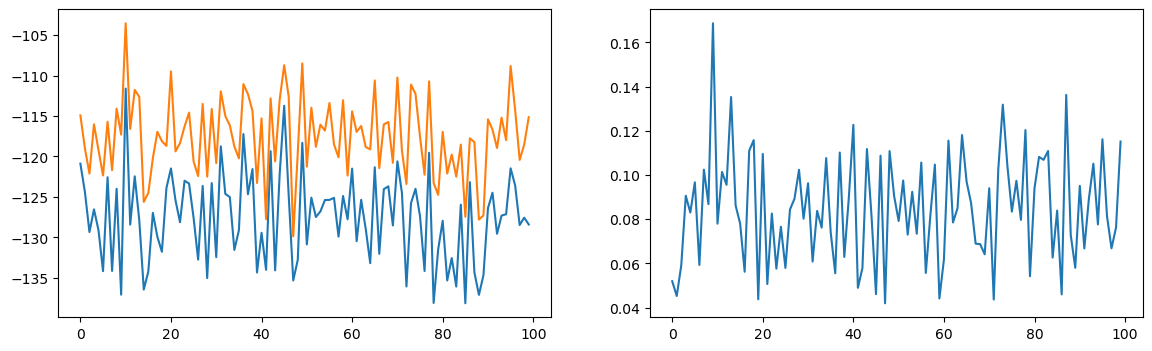

In [63]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(res[:,0])
plt.plot(res_drw[:,0])

plt.subplot(122)
plt.plot((res[:,0]-res_drw[:,0])/res_drw[:,0])




In [64]:
# larger numbers, bigger relative improvment
improvment = (res[:,0]-res_drw[:,0])/res_drw[:,0]


In [65]:
"""
0. Negative log-likelihood of the Gaussian Process model
1. log_drw_scale = theta[0]
2. log_drw_amp = theta[1]
3. log_per_scale = theta[2]
4. log_per_amp = theta[3]
"""

'\n0. Negative log-likelihood of the Gaussian Process model\n1. log_drw_scale = theta[0]\n2. log_drw_amp = theta[1]\n3. log_per_scale = theta[2]\n4. log_per_amp = theta[3]\n'

(-0.6468226345873909, -0.27162951145779246)

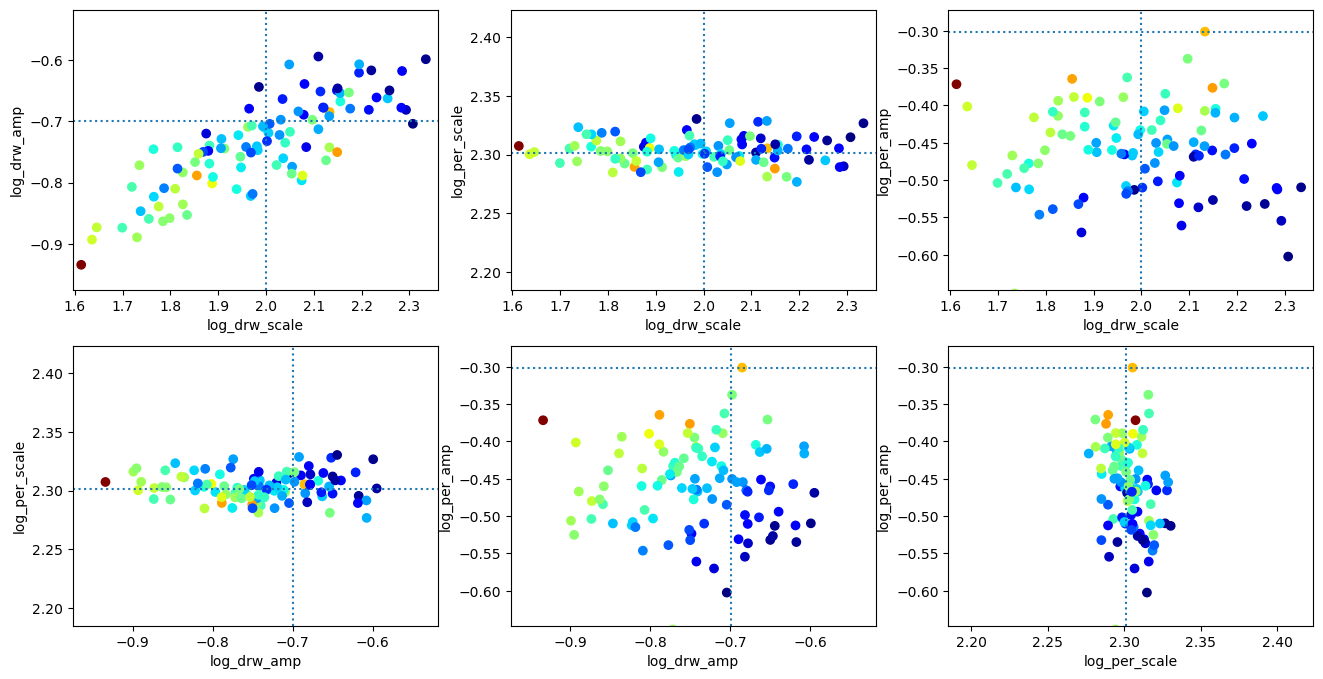

In [92]:
plt.figure(figsize=(16,8))
plt.subplot(2,3, 1)
plt.scatter(res[:,1],res[:,2], c=improvment, cmap='jet')
plt.xlabel('log_drw_scale')
plt.ylabel('log_drw_amp')
plt.axvline(np.log10(drw_tau), ls=':')
plt.axhline(np.log10(drw_amp), ls=':')
plt.xlim(np.quantile(res[:,1],0.05) - .1, np.quantile(res[:,1],0.95) + .1)
plt.ylim(np.quantile(res[:,2],0.05) - .1, np.quantile(res[:,2],0.95) + .1)


plt.subplot(2, 3, 2)
plt.scatter(res[:,1],res[:,3]-np.log10(2*np.pi), c=improvment, cmap='jet')
plt.xlabel('log_drw_scale')
plt.ylabel('log_per_scale')
plt.axvline(np.log10(drw_tau), ls=':')
plt.axhline(np.log10(per_tau), ls=':')
plt.xlim(np.quantile(res[:,1],0.05)- .1, np.quantile(res[:,1],0.95)+ .1)
plt.ylim(np.quantile(res[:,3],0.05)-np.log10(2*np.pi) - .1, np.quantile(res[:,3],0.95)-np.log10(2*np.pi)+ .1)

plt.subplot(2, 3, 3)
plt.scatter(res[:,1],res[:,4], c=improvment, cmap='jet')
plt.xlabel('log_drw_scale')
plt.ylabel('log_per_amp')
plt.axvline(np.log10(drw_tau), ls=':')
plt.axhline(np.log10(per_amp), ls=':')
plt.xlim(np.quantile(res[:,1],0.05)- .1, np.quantile(res[:,1],0.95)+ .1)
plt.ylim(np.quantile(res[:,4],0.05)- .1, np.quantile(res[:,4],0.95)+ .1)

plt.subplot(2, 3, 4)
plt.scatter(res[:,2],res[:,3]-np.log10(2*np.pi), c=improvment, cmap='jet')
plt.xlabel('log_drw_amp')
plt.ylabel('log_per_scale')
plt.axvline(np.log10(drw_amp), ls=':')
plt.axhline(np.log10(per_tau), ls=':')
plt.xlim(np.quantile(res[:,2],0.05)- .1, np.quantile(res[:,2],0.95)+ .1)
plt.ylim(np.quantile(res[:,3]-np.log10(2*np.pi),0.05)- .1, np.quantile(res[:,3]-np.log10(2*np.pi),0.95)+ .1)

plt.subplot(2, 3, 5)
plt.scatter(res[:,2],res[:,4], c=improvment, cmap='jet')
plt.xlabel('log_drw_amp')
plt.ylabel('log_per_amp')
plt.axvline(np.log10(drw_amp), ls=':')
plt.axhline(np.log10(per_amp), ls=':')
plt.xlim(np.quantile(res[:,2],0.05)- .1, np.quantile(res[:,2],0.95)+ .1)
plt.ylim(np.quantile(res[:,4],0.05)- .1, np.quantile(res[:,4],0.95)+ .1)

plt.subplot(2, 3, 6)
plt.scatter(res[:,3]-np.log10(2*np.pi),res[:,4], c=improvment, cmap='jet')
plt.xlabel('log_per_scale')
plt.ylabel('log_per_amp')
plt.axhline(np.log10(per_amp), ls=':')
plt.axvline(np.log10(per_tau), ls=':')
plt.xlim(np.quantile(res[:,3],0.05)-np.log10(2*np.pi)- .1, np.quantile(res[:,3],0.95)-np.log10(2*np.pi)+ .1)
plt.ylim(np.quantile(res[:,4],0.05)- .1, np.quantile(res[:,4],0.95)+ .1)

In [90]:
10**2.3

199.52623149688787

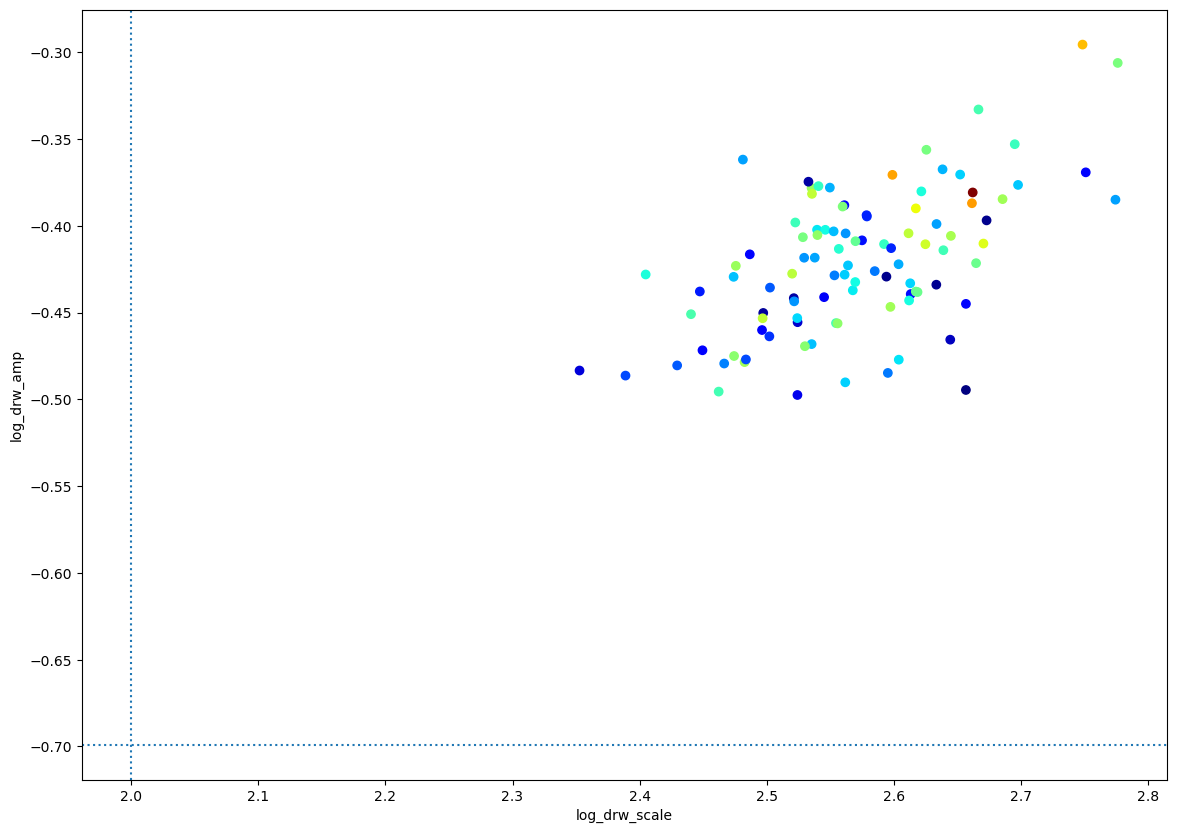

In [80]:
plt.figure(figsize=(14,10))

plt.scatter(res_drw[:,1],res_drw[:,2], c=improvment, cmap='jet')
plt.xlabel('log_drw_scale')
plt.ylabel('log_drw_amp')
plt.axvline(np.log10(100), ls=':')
plt.axhline(np.log10(0.2), ls=':')

# LSST generated data 

In [68]:
y_multi_LSST = np.load('/astro/users/ncaplar/data/y_multi_LSST.npy')
t_multi_LSST = np.load('/astro/users/ncaplar/data/t_multi_LSST.npy')

In [69]:
Per = 200
phi = 0.23
per_amp = 0.2
y_per = per_amp * np.sin(t_multi_LSST[0]/Per + phi)

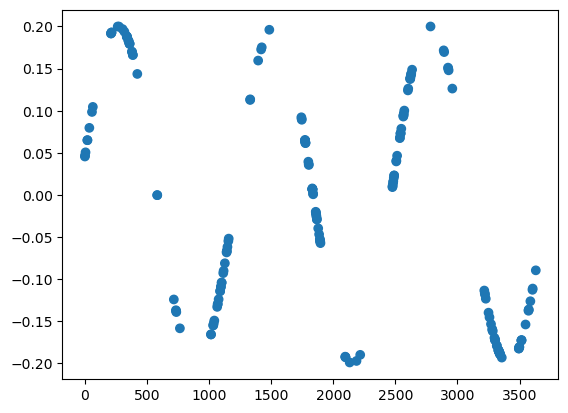

In [70]:
plt.scatter(t_multi_LSST[0], y_per, ls='')

In [71]:
y_multi_LSST + y_per

array([[-0.07359852, -0.04612167, -0.00196059, ..., -0.59673936,
        -0.543824  , -0.23793594],
       [ 0.08530959,  0.09424759,  0.02610941, ..., -0.19988286,
        -0.17010108, -0.10086039],
       [ 0.23129914,  0.27838915,  0.28612066, ..., -0.46797093,
        -0.43365085, -0.29644585],
       ...,
       [ 0.16770202,  0.20572496,  0.25759362, ..., -0.3785575 ,
        -0.39208178, -0.14423445],
       [-0.15173096, -0.1524529 , -0.21500996, ..., -0.34697469,
        -0.38502071, -0.17984674],
       [-0.11390127, -0.11523659, -0.02144464, ..., -0.21261826,
        -0.23641648, -0.09831828]])

In [72]:
y_multi_LSST

array([[-0.11919403, -0.09289131, -0.05253416, ..., -0.48408642,
        -0.43267131, -0.14841567],
       [ 0.03971408,  0.04747795, -0.02446416, ..., -0.08722993,
        -0.05894839, -0.01134011],
       [ 0.18570363,  0.23161952,  0.23554708, ..., -0.35531799,
        -0.32249816, -0.20692557],
       ...,
       [ 0.12210651,  0.15895532,  0.20702004, ..., -0.26590457,
        -0.2809291 , -0.05471417],
       [-0.19732647, -0.19922254, -0.26558354, ..., -0.23432176,
        -0.27386802, -0.09032646],
       [-0.15949678, -0.16200622, -0.07201822, ..., -0.09996532,
        -0.12526379, -0.008798  ]])